In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd '/content/drive/MyDrive/ColabNotebooks/Lec2_datasets'

/content/drive/MyDrive/ColabNotebooks/Lec2_datasets


https://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

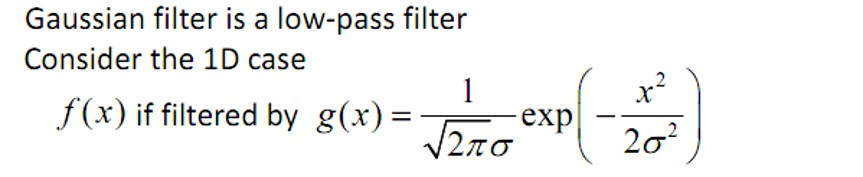

In [3]:
# import torchvision.transforms.functional as TF
# from PIL import Image
# # image = Image.open(image_path)
# image_PIL = Image.open("../images/cameraman.png")
# # image_ts_PIL= TF.to_tensor(image_PIL)

# # print(image_ts_PIL.shape)

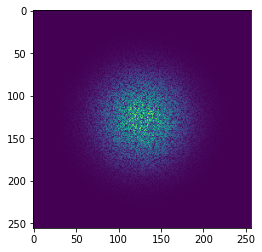

In [4]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Define 2D Gaussian kernel
def gkern(kernlen=256, std=128):
    """Returns a 2D Gaussian kernel array."""
    gkern1d = signal.gaussian(kernlen, std=std).reshape(kernlen, 1)
    gkern2d = np.outer(gkern1d, gkern1d)
    return gkern2d

# Generate random matrix and multiply the kernel by it
A = np.random.rand(256*256).reshape([256,256])

# Test plot
plt.figure()
plt.imshow(A*gkern(256, std=32))
plt.show()

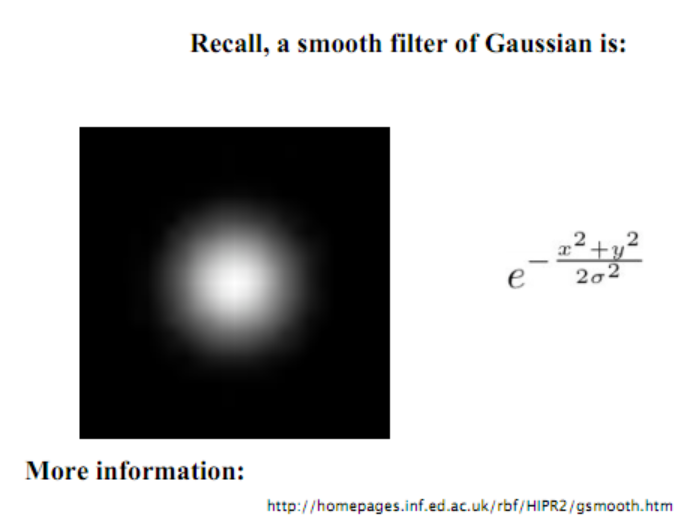

Hàm signal.gaussian có thể thực hiện như dưới đây:

In [5]:
import torch
import numpy as np
def gaussian_fn(M, std):
    n = torch.arange(0, M) - (M - 1.0) / 2.0  #giá trị trừ đi mean (normalizing)
    sig2 = 2 * std * std
    w = torch.exp(-n ** 2 / sig2)  # hệ số 1/sqrt(2pi*sigma), có thể dùng bên ngoài
    return w

def gkern(kernlen=256, std=128):
    """Returns a 2D Gaussian kernel array."""
    gkern1d = gaussian_fn(kernlen, std=std) 
    gkern2d = torch.outer(gkern1d, gkern1d)#Outer product 
    return gkern2d
#https://stackoverflow.com/questions/60534909/gaussian-filter-in-pytorch
# Generate random matrix and multiply the kernel by it
A = np.random.rand(256*256).reshape([256,256])
A = torch.from_numpy(A)
g_filter = gkern(256, std=32)


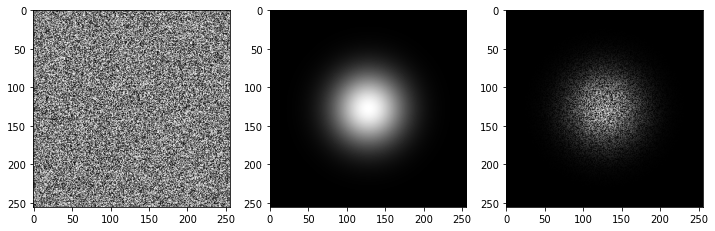

In [6]:
ax=[]
f = plt.figure(figsize=(12,5))
ax.append(f.add_subplot(131))
ax.append(f.add_subplot(132))
ax.append(f.add_subplot(133))
ax[0].imshow(A, cmap='gray')
ax[1].imshow(g_filter, cmap='gray')
ax[2].imshow(A*g_filter, cmap='gray')
plt.show()

Just checking with images

In [7]:
import torchvision.transforms.functional as TF
from PIL import Image
# image = Image.open(image_path)
image_PIL = Image.open("/content/drive/MyDrive/ColabNotebooks/Lec2_datasets/images/cogaihalan.jpg")
# image_ts_PIL= TF.to_tensor(image_PIL)

# print(image_ts_PIL.shape)

In [8]:
image_PIL=image_PIL.resize((256,256))
A = TF.to_tensor(image_PIL)
# guassian_filter = gkern(256, std=32)
g_filter = gkern(256, std=32)
A.size()

torch.Size([3, 256, 256])

In [11]:
ten=torch.unbind(A)
A_=ten[0].unsqueeze(0)
A_.shape

torch.Size([1, 256, 256])

In [9]:
g_filter.size()

torch.Size([256, 256])

In [12]:
out_filt=A_*g_filter
out_filt.size()

torch.Size([1, 256, 256])

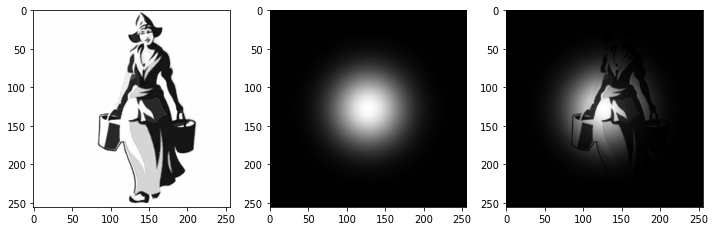

In [13]:
ax=[]
f = plt.figure(figsize=(12,5))
ax.append(f.add_subplot(131))
ax.append(f.add_subplot(132))
ax.append(f.add_subplot(133))
ax[0].imshow(A.permute(1,2,0)[:,:,0], cmap='gray')
ax[1].imshow(g_filter, cmap='gray')
ax[2].imshow(out_filt.permute(1,2,0)[:,:,0], cmap='gray')
plt.show()

### Gaussian blurring

### Cách 1: Dùng trực tiếp PIL's ImageFilter.GaussianBlur transform

In [14]:
#https://discuss.pytorch.org/t/is-there-anyway-to-do-gaussian-filtering-for-an-image-2d-3d-in-pytorch/12351/11
import numbers
import numpy as np
from PIL import ImageFilter

class GaussianSmoothing(object):
    def __init__(self, radius):
        if isinstance(radius, numbers.Number): #kiểm tra xem môt đối tượng (tham số thứ nhất) là một instance hay là một lớp con của Classinfo (tham số thứ hai) (Number)
            self.min_radius = radius
            self.max_radius = radius
        elif isinstance(radius, list):  #là list?
            if len(radius) != 2:
                raise Exception(
                    "`radius` should be a number or a list of two numbers")
            if radius[1] < radius[0]:
                raise Exception(
                    "radius[0] should be <= radius[1]")
            self.min_radius = radius[0]
            self.max_radius = radius[1]
        else:
            raise Exception(
                "`radius` should be a number or a list of two numbers")

    def __call__(self, image):
        radius = np.random.uniform(self.min_radius, self.max_radius)
        return image.filter(ImageFilter.GaussianBlur(radius))

In [15]:
from PIL import Image
import torchvision.transforms as T

# just add it before ToTensor(), which is ommited here 
# transform = T.Compose([
#     GaussianSmoothing([0, 5])
# ]) 

transform = T.Compose([
    GaussianSmoothing([0, 2])
]) 

# TEST_IMG = "../images/cogaihalan.jpg"
img = Image.open("/content/drive/MyDrive/ColabNotebooks/Lec2_datasets/images/hust.png").convert('RGB')
img_t = transform(img)

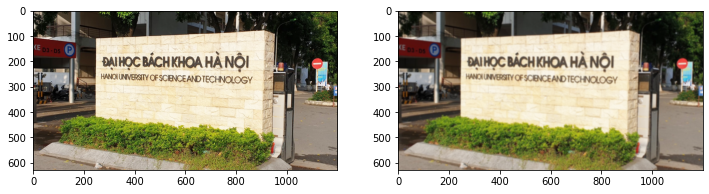

In [16]:
ax=[]
f = plt.figure(figsize=(12,5))
ax.append(f.add_subplot(121))
ax.append(f.add_subplot(122))
ax[0].imshow(img)
ax[1].imshow(img_t)
# ax[0].imshow(img, cmap='gray')
# ax[1].imshow(img_t, cmap='gray')
plt.show()

### Test with grayscale images

In [17]:
from PIL import Image
import torchvision.transforms as T

# just add it before ToTensor(), which is ommited here 
# transform = T.Compose([
#     GaussianSmoothing([0, 5])
# ]) 
transform = T.Compose([
    GaussianSmoothing([0, 2])
]) 
# TEST_IMG = "../images/HUST.jpg"
img = Image.open("/content/drive/MyDrive/ColabNotebooks/Lec2_datasets/images/hoa.jpg").convert('L')
img_t = transform(img)

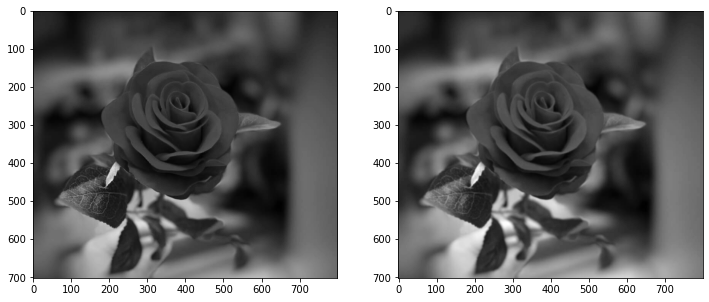

In [18]:
ax=[]
f = plt.figure(figsize=(12,5))
ax.append(f.add_subplot(121))
ax.append(f.add_subplot(122))
# ax[0].imshow(img)
# ax[1].imshow(img_t)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(img_t, cmap='gray')
plt.show()

In [19]:
# from PIL import Image
# import torchvision.transforms as T

# just add it before ToTensor(), which is ommited here 
# transform = T.Compose([
#     GaussianSmoothing([0, 5])
# ]) 
transform = T.Compose([
    GaussianSmoothing([0, 3])
]) 
# TEST_IMG = "../images/noisy2.png"

# TEST_IMG = "../images/HUST.jpg"
img = Image.open("/content/drive/MyDrive/ColabNotebooks/Lec2_datasets/images/img_noise.jpg").convert('L')
img_t = transform(img)

In [20]:
img.size

(289, 276)

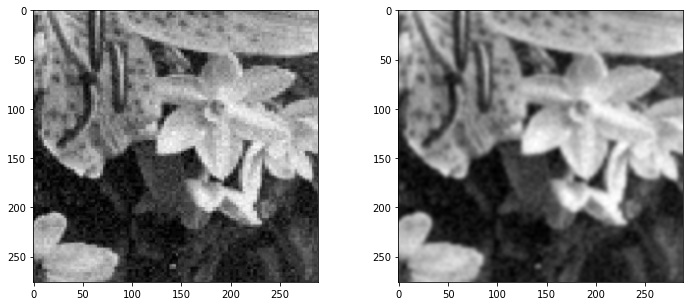

In [21]:
ax=[]
f = plt.figure(figsize=(12,5))
ax.append(f.add_subplot(121))
ax.append(f.add_subplot(122))
# ax[0].imshow(img)
# ax[1].imshow(img_t)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(img_t, cmap='gray')
plt.show()

In [22]:
# from PIL import Image
# import torchvision.transforms as T

# just add it before ToTensor(), which is ommited here 
# transform = T.Compose([
#     GaussianSmoothing([0, 5])
# ]) 
transform = T.Compose([
    GaussianSmoothing([0, 3])
]) 

import cv2
import numpy as np

img_org = cv2.imread("/content/drive/MyDrive/ColabNotebooks/Lec2_datasets/images/noisy2.png")
img = cv2.resize(img_org,(256, 256), interpolation=cv2.INTER_CUBIC)
print(img_org.shape,img.shape)

(200, 201, 3) (256, 256, 3)


In [23]:
cv2.imwrite('/content/drive/MyDrive/ColabNotebooks/Lec2_datasets/images/noisy2_resize.png', img)
TEST_IMG =('/content/drive/MyDrive/ColabNotebooks/Lec2_datasets/images/noisy2_resize.png')
img = Image.open('/content/drive/MyDrive/ColabNotebooks/Lec2_datasets/images/noisy2_resize.png')
img_t = transform(img)

Text(0.5, 1.0, 'Sau Gaussian smoothing')

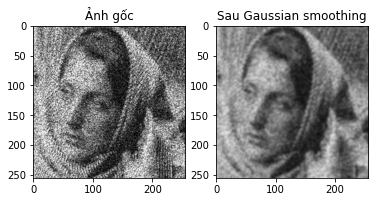

In [24]:
# ax=[]
# f = plt.figure(figsize=(12,5))
# ax.append(f.add_subplot(121))
# ax.append(f.add_subplot(122))
# ax[0].imshow(img)
# ax[1].imshow(img_t)
plt.figure
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Ảnh gốc')
plt.subplot(122)
plt.imshow(img_t, cmap='gray')
plt.title('Sau Gaussian smoothing')
# plt.show()

### Cách 2: Gaussian blurring với custom function

In [25]:
import math
import numbers
import torch
from torch import nn
from torch.nn import functional as F

class GaussianSmoothing_custom(nn.Module):
    """
    Apply gaussian smoothing on a
    1d, 2d or 3d tensor. Filtering is performed seperately for each channel
    in the input using a depthwise convolution.
    Arguments:
        channels (int, sequence): Number of channels of the input tensors. Output will
            have this number of channels as well.
        kernel_size (int, sequence): Size of the gaussian kernel.
        sigma (float, sequence): Standard deviation of the gaussian kernel.
        dim (int, optional): The number of dimensions of the data.
            Default value is 2 (spatial).
    """
    
    def __init__(self, channels, kernel_size, sigma, dim=2):
        super(GaussianSmoothing_custom, self).__init__()
        if isinstance(kernel_size, numbers.Number):
            kernel_size = [kernel_size] * dim
        if isinstance(sigma, numbers.Number):
            sigma = [sigma] * dim

        # The gaussian kernel is the product of the
        # gaussian function of each dimension.
        kernel = 1
        meshgrids = torch.meshgrid(
            [
                torch.arange(size, dtype=torch.float32)
                for size in kernel_size
            ]
        )
        for size, std, mgrid in zip(kernel_size, sigma, meshgrids):
            mean = (size - 1) / 2
            kernel *= 1 / (std * math.sqrt(2 * math.pi)) * \
                      torch.exp(-((mgrid - mean) / std) ** 2 / 2)

        # Make sure sum of values in gaussian kernel equals 1.
        kernel = kernel / torch.sum(kernel)

        # Reshape to depthwise convolutional weight
        kernel = kernel.view(1, 1, *kernel.size())
        kernel = kernel.repeat(channels, *[1] * (kernel.dim() - 1))

        self.register_buffer('weight', kernel)
        self.groups = channels

        if dim == 1:
            self.conv = F.conv1d
        elif dim == 2:
            self.conv = F.conv2d
        elif dim == 3:
            self.conv = F.conv3d
        else:
            raise RuntimeError(
                'Only 1, 2 and 3 dimensions are supported. Received {}.'.format(dim)
            )

    def forward(self, input):
        """
        Apply gaussian filter to input.
        Arguments:
            input (torch.Tensor): Input to apply gaussian filter on.
        Returns:
            filtered (torch.Tensor): Filtered output.
        """
        return self.conv(input, weight=self.weight, groups=self.groups)

#Ví dụ sử dụng
smoothing = GaussianSmoothing_custom(3, 5, 1)
input = torch.rand(1, 3, 100, 100)
input = F.pad(input, (2, 2, 2, 2), mode='reflect')
output = smoothing(input)

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [26]:
from PIL import Image
import torchvision.transforms as T
import torchvision.transforms.functional as TF

# just add it before ToTensor(), which is ommited here 
# transform = T.Compose([
#     GaussianSmoothing([0, 5])
# ]) 

transform_1 = T.Compose([
    GaussianSmoothing_custom(3, 5, 1)
]) 

# TEST_IMG = "../images/cameraman.png"
TEST_IMG = "/content/drive/MyDrive/ColabNotebooks/Lec2_datasets/images/hust.png"
img = Image.open(TEST_IMG)


# smoothing = GaussianSmoothing_custom(3, 5, 1)
# input = torch.rand(1, 3, 100, 100)
TEST_IMG = "/content/drive/MyDrive/ColabNotebooks/Lec2_datasets/images/hust.png"
img = Image.open(TEST_IMG)
image_ts_PIL= TF.to_tensor(img)
image_ts_PIL.size()
img1=image_ts_PIL.unsqueeze(0)
# img1.size()
# input=img1
input = F.pad(img1, (2,2, 2, 2), mode='reflect')
# output = smoothing(input)
# output.size()


img_t = transform_1(input)

In [27]:
img_t.size()

torch.Size([1, 3, 628, 1200])

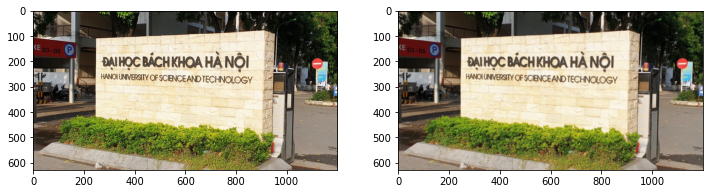

In [28]:
import matplotlib.pyplot as plt
ax=[]
f = plt.figure(figsize=(12,5))
ax.append(f.add_subplot(121))
ax.append(f.add_subplot(122))
# ax[0].imshow(img)
# ax[1].imshow(img_t)
ax[0].imshow(img)
ax[1].imshow(img_t.permute(2,3,1,0)[:,:,:,0])
plt.show()

### Example with noise image

In [35]:
TEST_IMG =("/content/drive/MyDrive/ColabNotebooks/Lec2_datasets/images/noisy2_resize.png")
img = Image.open(TEST_IMG)
# img_t = transform(img)

image_ts_PIL= TF.to_tensor(img)
image_ts_PIL.size()
img1=image_ts_PIL.unsqueeze(0)
# img1.size()
# input=img1
input = F.pad(img1, (2, 2, 2, 2), mode='reflect')


In [36]:
transform_2 = T.Compose([
    GaussianSmoothing_custom(3, 5, 7)
]) 

In [68]:
img_t = transform_2(input)

Text(0.5, 1.0, 'Sau Gaussian smoothing')

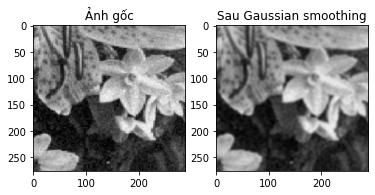

In [69]:
# ax=[]
# f = plt.figure(figsize=(12,5))
# ax.append(f.add_subplot(121))
# ax.append(f.add_subplot(122))
# ax[0].imshow(img)
# ax[1].imshow(img_t)
plt.figure
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Ảnh gốc')
plt.subplot(122)
plt.imshow(img_t.permute(2,3,1,0)[:,:,:,0], cmap='gray')
plt.title('Sau Gaussian smoothing')
# plt.show()

### Thử với các ảnh khác, nhiễu khác nhau, và thử thay đổi kernel size, sigma xem có gì thay đổi

Example with noise image

In [62]:
TEST_IMG =("/content/drive/MyDrive/ColabNotebooks/Lec2_datasets/images/img_noise.jpg")
img = Image.open(TEST_IMG)
# img_t = transform(img)

image_ts_PIL= TF.to_tensor(img)
image_ts_PIL.size()
img1=image_ts_PIL.unsqueeze(0)
# img1.size()
# input=img1
input = F.pad(img1, (2, 2, 2, 2), mode='reflect')

In [65]:
transform_3 = T.Compose([
    GaussianSmoothing_custom(3, 6, 9)
]) 

In [66]:
img_t = transform_3(input)

Text(0.5, 1.0, 'Sau Gaussian smoothing')

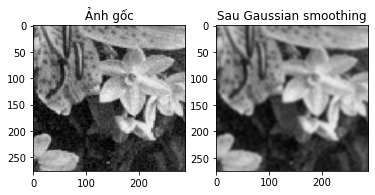

In [67]:
plt.figure
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Ảnh gốc')
plt.subplot(122)
plt.imshow(img_t.permute(2,3,1,0)[:,:,:,0], cmap='gray')
plt.title('Sau Gaussian smoothing')

Đọc thêm: giải thích chi tiết 1 số lệnh

In [39]:
output.size()

torch.Size([1, 3, 100, 100])

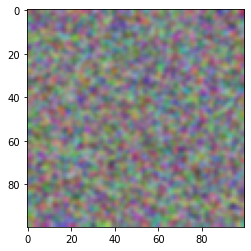

In [40]:
plt.imshow(output.permute(2,3,1,0)[:,:,:,0])

Test with our images

In [41]:
smoothing = GaussianSmoothing_custom(3, 5, 1)
# input = torch.rand(1, 3, 100, 100)
TEST_IMG = "/content/drive/MyDrive/ColabNotebooks/Lec2_datasets/images/hust.png"
img = Image.open(TEST_IMG)
image_ts_PIL= TF.to_tensor(img)
image_ts_PIL.size()

torch.Size([3, 628, 1200])

In [42]:
img1=image_ts_PIL.unsqueeze(0)
img1.size()

torch.Size([1, 3, 628, 1200])

In [43]:
input=img1
input = F.pad(input, (2,2, 2, 2), mode='reflect')
output = smoothing(input)
output.size()

torch.Size([1, 3, 628, 1200])

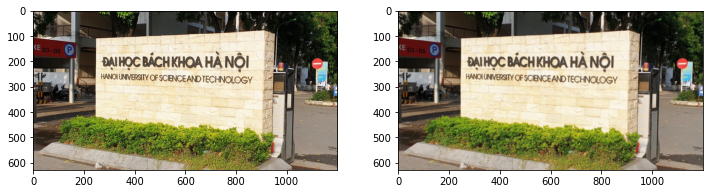

In [44]:
ax=[]
f = plt.figure(figsize=(12,5))
ax.append(f.add_subplot(121))
ax.append(f.add_subplot(122))
ax[0].imshow(img)
ax[1].imshow(output.permute(2,3,1,0)[:,:,:,0])
plt.show()

In [45]:
from PIL import Image
import torchvision.transforms as T

# just add it before ToTensor(), which is ommited here 
transform = T.Compose([
    GaussianSmoothing([0, 5])
]) 

TEST_IMG = "/content/drive/MyDrive/ColabNotebooks/Lec2_datasets/images/cogaihalan.jpg"
# TEST_IMG = "/content/drive/MyDrive/ColabNotebooks/Lec2_datasets/images/cogaihalan.jpg"
img = Image.open(TEST_IMG)
img_t = transform(img)

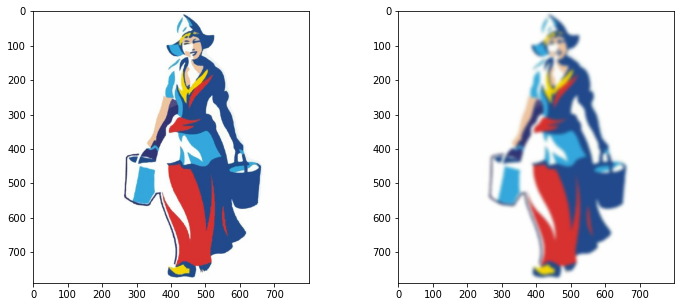

In [46]:
ax=[]
f = plt.figure(figsize=(12,5))
ax.append(f.add_subplot(121))
ax.append(f.add_subplot(122))
# ax[0].imshow(img)
# ax[1].imshow(img_t)
ax[0].imshow(img, cmap='gray')
ax[1].imshow(img_t, cmap='gray')
plt.show()

In [47]:
smoothing = GaussianSmoothing_custom(3, 5, 1)
# input = torch.rand(1, 3, 100, 100)
TEST_IMG = "/content/drive/MyDrive/ColabNotebooks/Lec2_datasets/images/cogaihalan.jpg"
img = Image.open(TEST_IMG)
image_ts_PIL= TF.to_tensor(img)
# print(image_ts_PIL.size())
print('\nKích thước ảnh (tensor) ban đầu: ' + str(image_ts_PIL.size()))

img1=image_ts_PIL.unsqueeze(0)
print('\nKích thước sau khi mở chiều: ' + str(img1.size()))


Kích thước ảnh (tensor) ban đầu: torch.Size([3, 789, 800])

Kích thước sau khi mở chiều: torch.Size([1, 3, 789, 800])


Lệnh dưới đây sẽ báo lỗi do hàm yêu cầu số kênh là 3

In [48]:
input=img1
input = F.pad(input, (2,2, 2, 2), mode='reflect')
# output = smoothing(input) #Get error


Do vậy cần convert ảnh sang RGB trước khi thực hiện smoothing

In [49]:
smoothing = GaussianSmoothing_custom(3, 5, 1)
# input = torch.rand(1, 3, 100, 100)
TEST_IMG = "/content/drive/MyDrive/ColabNotebooks/Lec2_datasets/images/cogaihalan.jpg"
img = Image.open(TEST_IMG)
rgb_im = img.convert('RGB')

image_ts_PIL= TF.to_tensor(rgb_im)
# print(image_ts_PIL.size())
print('\nKích thước ảnh (tensor) ban đầu: ' + str(image_ts_PIL.size()))

img1=image_ts_PIL.unsqueeze(0)
print('\nKích thước sau khi mở chiều: ' + str(img1.size()))


Kích thước ảnh (tensor) ban đầu: torch.Size([3, 789, 800])

Kích thước sau khi mở chiều: torch.Size([1, 3, 789, 800])


In [50]:
input=img1
input = F.pad(input, (2,2, 2, 2), mode='reflect')
output = smoothing(input) 
print('\nSize sau khi thực hiện smoothing: '+str(output.size()))


Size sau khi thực hiện smoothing: torch.Size([1, 3, 789, 800])


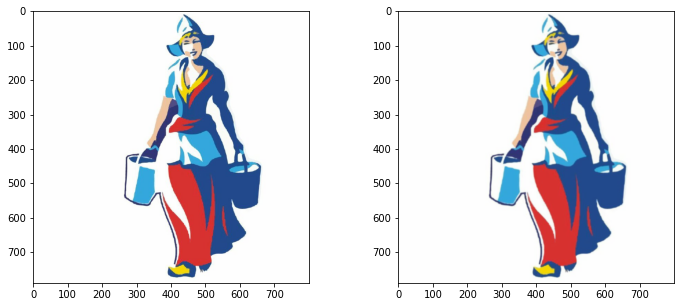

In [52]:
ax=[]
f = plt.figure(figsize=(12,5))
ax.append(f.add_subplot(121))
ax.append(f.add_subplot(122))
ax[0].imshow(img)
ax[1].imshow(output.permute(2,3,1,0)[:,:,:,0])
plt.show()

### Giải thích lệnh: imshow(output.permute(2,3,1,0)[:,:,:,0])

ở đây ta dùng cách: đẩy cột, hàng của ảnh ra phía trước để dùng imshow:

In [53]:
print('\nSize của moothing: '+str(output.size()))



Size của moothing: torch.Size([1, 3, 789, 800])


Dùng lệnh permute:

In [54]:
output1=output.permute(2,3,1,0)
print(output1.size())

torch.Size([789, 800, 3, 1])


Để dùng plt.imshow, ta bỏ cột cuối cùng đi

torch.Size([789, 800, 3])


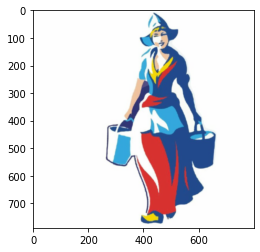

In [55]:
output2=output1[:,:,:,0]
print(output2.size())
plt.imshow(output2)

Thay vì dùng lệnh gộp: imshow(output.permute(2,3,1,0)[:,:,:,0]), ta có thể dùng từng lệnh một 

In [56]:
print('\nSize của moothing: '+str(output.size()))


Size của moothing: torch.Size([1, 3, 789, 800])


Để tensor chỉ còn kích thước [3,R,C] (bỏ cột 0 đi):

In [57]:
img2=output.squeeze(0)
print('\nSize sau khi thực hiện squeeze: '+str(img2.size()))


Size sau khi thực hiện squeeze: torch.Size([3, 789, 800])


Hoặc có thể dùng lệnh:

In [58]:
img2b=output[0,:,:,:]
img2b.size()

torch.Size([3, 789, 800])

Ở đây ta dùng cách: đẩy cột, hàng của ảnh ra phía trước để dùng imshow: \\
Sau đấy mới permute để chuyển số kênh ra sau:

torch.Size([789, 800, 3])


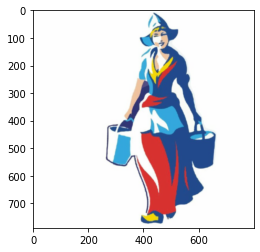

In [59]:
output1=img2.permute(1,2,0)
print(output1.size())
plt.imshow(output1)

torch.Size([789, 800, 3])


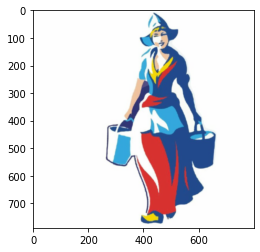

In [60]:
output1=img2b.permute(1,2,0)
print(output1.size())
plt.imshow(output1)